### Let's analyse and cluster YouTube videos based on their Titles, Description and Comments

In [ ]:
This notebook contains the clustering algorithm

#### Data Acquisition: 
- Data for this analysis was acquired using a scraper and YouTube Data API pipeline. 
- VideoId is the unique identitifer for each video and is used as index for comments as well. 

### Let's first get all the comments we have and combine them

##### Installation and Import statements

In [5]:
pip install numpy==1.21

  Using cached numpy-1.21.0-cp38-cp38-macosx_10_9_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.4.0 requires daal==2021.3.0, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.21.0 which is incompatible.
dowhy 0.9 requires numpy<2.0.0,>=1.23.1, but you have numpy 1.21.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install google_trans_new

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install googletrans

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


##### EMOT is a python library that translates emojis and emoticons to its meaning. 
For example the emoji 🙏 translates to 'folded_hands'. 

This translation is important to identify the signature comments for this subset of videos. 

In [6]:

pip install emot

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17415 sha256=929a580ef9b220c61d478cf327c0ef080548632c7ca479e2e60402c3aed2c901
  Stored in directory: /Users/tabziasmac/Library/Caches/pip/wheels/a9/25/af/715361fa79594524c89c75d293def652045f3fdce6ca398712
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

from google_trans_new import google_translator  

translator = google_translator()  

In [7]:
import googletrans
print( googletrans.__version__)

4.0.0-rc.1


In [8]:
import gensim
import pandas as pd
import os
import string
import matplotlib as mpl
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import nltk
from gensim.utils import tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from nltk.probability import FreqDist
import string as s
import re
import pickle
import gensim.corpora as corpora
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

import os


In [9]:
import spacy

##### Function to merge all the comments for each video into one single row of information. 

In [5]:
def create_comments_dataset(file_list, dataset_desc_comments):
    for file in file_list:
                if file == '.DS_Store':
                    continue
                df_temp = pd.read_csv(file_path_metadata + file)
                
                dataset_desc_comments = dataset_desc_comments.append(df_temp, ignore_index=True)
    
    dataset_desc_comments['new_comment'] = dataset_desc_comments['new_comment'].astype(str)
    
    # concatenate the string
    dataset_desc_comments = dataset_desc_comments.groupby('videoId').agg({'new_comment': ' '.join}).reset_index()

    dataset_desc_comments.to_csv("/Users/tabziasmac/Downloads/Thesis-Dataset/Combined/Combined_comments.csv")

    #print(dataset_descriptions)
    return dataset_desc_comments

In [ ]:
# define the file path where the comment dataframes are stored.
file_path_metadata = "/Users/tabziasmac/Downloads/Thesis-Dataset/Comments/"
# list all the files from the directory
file_list = os.listdir(file_path_metadata)
i = 0

In [6]:
comms_df = create_comments_dataset(file_list, dataset_desc_comments)

NameError: name 'file_list' is not defined

In [ ]:
#test code - run to check the number of videos in the dataset post combining
len(list(comms_df['videoId']))

In [4]:
dataset_desc_comments = pd.DataFrame()    

##### Lets also merge all the text for each video i.e., merge Title, Description and Comments 

In [5]:
file_path_metadata = "/Users/tabziasmac/Downloads/Thesis-Dataset/Combined/"
# list all the files from the directory
file_list = os.listdir(file_path_metadata)
i = 0

In [6]:
def create_dataset(file_list, dataset_desc_comments):
    df_cd = pd.DataFrame()
    df_comms = pd.read_csv(file_path_metadata + file_list[0])
    df_meta = pd.read_csv(file_path_metadata + file_list[1])
    df_cd = pd.merge(df_comms, df_meta, how='inner', on = 'videoId')

    #if not df_cd.empty:
    #    df_cd = df_cd.drop_duplicates('videoId', keep='last')

    #dataset_desc_comments = dataset_desc_comments.reset_index(drop=True)
    
    #dataset_desc_comments = dataset_desc_comments.astype(str)

    df_cd.to_csv("/Users/tabziasmac/Downloads/Thesis-Dataset/Combined/Combined_metadata_comments.csv")
    #dataset_desc_comments = dataset_desc_comments.drop(['Unnamed: 0'], axis=1)

    #print(dataset_descriptions)

    return df_cd

In [7]:
#create_dataset
df_cd = create_dataset(file_list, dataset_desc_comments)

In [8]:
df_cd_backup = df_cd

## Okay so now the dataframe we are using for analysis is df_cd

Let's do the data-preprocessing here

In [9]:
#drop unrequired columns - anything starting with Unnamed: - Unnamed: 0_y

df_cd = df_cd[df_cd.columns.drop(list(df_cd.filter(regex='Unnamed:')))]

In [16]:
df_cd

,videoId,publishedDate,title,videoUrl,description,channelId,channelTitle,new_comment,Title_Desc_Comm,Title_Desc,Desc_Comm,Title_Comm
132,Jqz5L8X4V8s,2023-01-08T04:00:10Z,USA DONKEY VIDEO || Honduras Guatemala to || ह...,https://www.youtube.com/watch?v=Jqz5L8X4V8s,USA DONKEY VIDEO || Honduras Guatemala to Tapa...,UCtLr-VlUjuxh4zUQA6pu_zg,2 Numbari USA Wala,nan Abh Mausam kaisa hai matlab kaise kpde le ...,USA DONKEY VIDEO || Honduras Guatemala to || ह...,USA DONKEY VIDEO || Honduras Guatemala to || ह...,USA DONKEY VIDEO || Honduras Guatemala to Tapa...,USA DONKEY VIDEO || Honduras Guatemala to || ह...
135,9Mkbq0JFCP0,2023-02-11T11:50:00Z,Welcome in new vlog || again bday cake surpris...,https://www.youtube.com/watch?v=9Mkbq0JFCP0,Hello Thank you for watching this video Give y...,UCxe-tfucj4BB_4MxnoHd4Vw,2 number wale,nan Sir I am coming to meet you personally Hap...,Welcome in new vlog || again bday cake surpris...,Welcome in new vlog || again bday cake surpris...,Hello Thank you for watching this video Give y...,Welcome in new vlog || again bday cake surpris...
141,zKTpOIVSJrk,2022-05-09T15:56:26Z,dunkey to USA Via Panama Mexico.. fun video......,https://www.youtube.com/watch?v=zKTpOIVSJrk,this is a fun video created by me subject is d...,UCCjWLMPCbyS13whTycQ1jqw,Ajay Sharma,"nan Very sensitive issue Utpal sir,bade handso...",dunkey to USA Via Panama Mexico.. fun video......,dunkey to USA Via Panama Mexico.. fun video......,this is a fun video created by me subject is d...,dunkey to USA Via Panama Mexico.. fun video......
143,waSiwxvWRqk,2023-01-15T23:47:13Z,India &amp; Pakistan to Serbia Europe Donkey K...,https://www.youtube.com/watch?v=waSiwxvWRqk,India & Pakistan to Europe Donkey Ki Sachiye |...,UC4cb2H-Q3V6pt6bzcsFDxpw,Aman Riar Films,nan Right Wah kya bat righttt👍👍👍 Right Wah kya...,India &amp; Pakistan to Serbia Europe Donkey K...,India &amp; Pakistan to Serbia Europe Donkey K...,India & Pakistan to Europe Donkey Ki Sachiye |...,India &amp; Pakistan to Serbia Europe Donkey K...
155,MyRFQpEoE-s,2023-01-04T01:30:06Z,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,https://www.youtube.com/watch?v=MyRFQpEoE-s,Jai Mata Di America #usa #usa #america #tr...,UC1X4PBVhNsyavmtdy2XOZFA,Ankush Malik Vlogs,nan lulli se youtube channel ke liye kitna kha...,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,Jai Mata Di America #usa #usa #america #tr...,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1911,t1m-R3CKJeI,2016-10-25T04:40:21Z,Big Cuz / Chunky Dunkin&#39; Official Video,https://www.youtube.com/watch?v=t1m-R3CKJeI,Performed by Big Cuz IG: big_c.u.z FB: www.fac...,UC4rGANj8sp61NsRVtFH04cw,Big Cuz,nan Thanks Tomato 🍅 Hello dad. Thanks Tomato 🍅...,Big Cuz / Chunky Dunkin&#39; Official Video P...,Big Cuz / Chunky Dunkin&#39; Official Video P...,Performed by Big Cuz IG: big_c.u.z FB: www.fac...,Big Cuz / Chunky Dunkin&#39; Official Video n...
1912,vVeAtCP7Hyw,2023-02-05T11:30:10Z,SPAIN EUROPE jaana ITNA EASY kaise ho paaya au...,https://www.youtube.com/watch?v=vVeAtCP7Hyw,How to travel in SPAIN Europe? . A lot of peop...,UCD8TJtF1r0xlEf7lNBR5Yzg,Soul Rover,nan Welcome to Spain 🇪🇸 Chalo ek diljale sedhe...,SPAIN EUROPE jaana ITNA EASY kaise ho paaya au...,SPAIN EUROPE jaana ITNA EASY kaise ho paaya au...,How to travel in SPAIN Europe? . A lot of peop...,SPAIN EUROPE jaana ITNA EASY kaise ho paaya au...
1913,0lV3LjLuGGw,2019-06-02T03:30:02Z,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,https://www.youtube.com/watch?v=0lV3LjLuGGw,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,UC3ar28GS6o1p0m_wabfk2zw,Pen Movies,nan ʙʜᴏᴛᴀᴀᴄʜᴀʜ Excellent ♥️♥️ Hii Very beautif...,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...
1914,HmwscxbLp58,2023-02-05T06:00:10Z,Libya🇵🇰🇱🇾🇮🇹To Italy By Ship2023

##### let's combine Title_Description_Comments

In [10]:
df_cd = df_cd.dropna()

In [11]:
df_cd['Title_Desc_Comm'] = df_cd['title'].astype(str) + "  " + df_cd['description'].astype(str) + "  " + df_cd['new_comment']

###### Additionally make combinations of the different text variables for each video.

In [12]:
df_cd['Title_Desc'] = df_cd['title'].astype(str) + "  " + df_cd['description']
df_cd['Desc_Comm'] = df_cd['description'].astype(str) + "  " + df_cd['new_comment']
df_cd['Title_Comm'] = df_cd['title'].astype(str) + "  " + df_cd['new_comment']

##### TEST CODE below to check if the combination have worked

In [13]:
list(df_cd['Title_Desc_Comm'])[0]

'USA DONKEY VIDEO || Honduras Guatemala to || होंडुरास ग्वाटेमाला से तपचुला का सफर! @jaspalthevlog  USA DONKEY VIDEO || Honduras Guatemala to Tapachula || होंडुरास ग्वाटेमाला से तपचुला ...  nan Abh Mausam kaisa hai matlab kaise kpde le ke aye Feb me Love you bhai❤🇺🇸🇺🇸 Berojgar hone se accha hai\nDonkey karna\nIndia me halat khrab he jobs ka bhi donki lgana ke liye kitna dollars chye Uper wala Malik ache rhe or acha kam hi mil jaye sb ko kush rkhe or gr walo ko bi Rahat de Je bhalla karna te agent da dsde praa Have a safe journey 😘 love from Pakistan Have a safe journey 😘 love from Pakistan bhai pisa kitna lagg jaawe hai? Bhai total kitna lakh kharca howa Insta pe reply kroo Bhai God bless u ❤️🚩 How did you charge your phone in jungle to make video for 1 month New video nahi aa rahi? 🤔 Bro jungle ch kinne din lagge c Bhai video upload karo 🙏🙏 New  blok kab daloge vera Number bejie bhai apna BAI AGGE KY VIDEO bhi dalo Abh Mausam kaisa hai matlab kaise kpde le ke aye Feb me Love you bhai❤

In [14]:
list(df_cd['Title_Comm'])[0]

'USA DONKEY VIDEO || Honduras Guatemala to || होंडुरास ग्वाटेमाला से तपचुला का सफर! @jaspalthevlog  nan Abh Mausam kaisa hai matlab kaise kpde le ke aye Feb me Love you bhai❤🇺🇸🇺🇸 Berojgar hone se accha hai\nDonkey karna\nIndia me halat khrab he jobs ka bhi donki lgana ke liye kitna dollars chye Uper wala Malik ache rhe or acha kam hi mil jaye sb ko kush rkhe or gr walo ko bi Rahat de Je bhalla karna te agent da dsde praa Have a safe journey 😘 love from Pakistan Have a safe journey 😘 love from Pakistan bhai pisa kitna lagg jaawe hai? Bhai total kitna lakh kharca howa Insta pe reply kroo Bhai God bless u ❤️🚩 How did you charge your phone in jungle to make video for 1 month New video nahi aa rahi? 🤔 Bro jungle ch kinne din lagge c Bhai video upload karo 🙏🙏 New  blok kab daloge vera Number bejie bhai apna BAI AGGE KY VIDEO bhi dalo Abh Mausam kaisa hai matlab kaise kpde le ke aye Feb me Love you bhai❤🇺🇸🇺🇸 Berojgar hone se accha hai\nDonkey karna\nIndia me halat khrab he jobs ka bhi donki l

In [15]:
list(df_cd['Desc_Comm'])[0]

'USA DONKEY VIDEO || Honduras Guatemala to Tapachula || होंडुरास ग्वाटेमाला से तपचुला ...  nan Abh Mausam kaisa hai matlab kaise kpde le ke aye Feb me Love you bhai❤🇺🇸🇺🇸 Berojgar hone se accha hai\nDonkey karna\nIndia me halat khrab he jobs ka bhi donki lgana ke liye kitna dollars chye Uper wala Malik ache rhe or acha kam hi mil jaye sb ko kush rkhe or gr walo ko bi Rahat de Je bhalla karna te agent da dsde praa Have a safe journey 😘 love from Pakistan Have a safe journey 😘 love from Pakistan bhai pisa kitna lagg jaawe hai? Bhai total kitna lakh kharca howa Insta pe reply kroo Bhai God bless u ❤️🚩 How did you charge your phone in jungle to make video for 1 month New video nahi aa rahi? 🤔 Bro jungle ch kinne din lagge c Bhai video upload karo 🙏🙏 New  blok kab daloge vera Number bejie bhai apna BAI AGGE KY VIDEO bhi dalo Abh Mausam kaisa hai matlab kaise kpde le ke aye Feb me Love you bhai❤🇺🇸🇺🇸 Berojgar hone se accha hai\nDonkey karna\nIndia me halat khrab he jobs ka bhi donki lgana ke l

In [16]:
list(df_cd['Title_Desc'])[0]

'USA DONKEY VIDEO || Honduras Guatemala to || होंडुरास ग्वाटेमाला से तपचुला का सफर! @jaspalthevlog  USA DONKEY VIDEO || Honduras Guatemala to Tapachula || होंडुरास ग्वाटेमाला से तपचुला ...'

###### Let's do the data processing now. 

In [18]:
from googletrans import Translator
translator = Translator()

###### Following are the Data Preprocessing Functions: 
- To remove punctuation
###### Here we are not replacing the punctuation '@' to capture all the Instagram Handles or Twitter Handles in the text. This information is important for Source Generation and Lede Generation for the story.  
- convert to lowercase
- convert emojis 
- convert emoticons 
- translate Hindi and Punjabi to English 
###### We have used Google translates package for this. Translation of regional language to English was important to analyse the bilingual titles, descriptions and comments. Specially when trying to capture the finer details in the text such as title of cities and countries that make the Donkey Paths. 
- Tokenize for clustering 
- Remove Stopwords
- Remove Spaces

In [56]:
#Data preprocessing functions

all_emojis = []
all_emoticons = []
puncts = string.punctuation.replace('@', '')
puncts = puncts.replace('+', '')

def remove_punctuation(text):
    txt_nopunct="".join([c for c in text if c not in puncts])
    return txt_nopunct

def convert_to_lowercase(text):
    text = text.lower()
    return text


# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        if emot in text:
            text = text.replace(emot, " "+"_".join(UNICODE_EMOJI[emot].replace(","," ").replace(":","").split())+" ")
            all_emojis.append(UNICODE_EMOJI[emot])
    return text


# Function for converting emoticons into word
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        if emot in text:
            text = text.replace(emot, " "+"_".join(EMOTICONS_EMO[emot].replace(",","").replace(":","").split())+" ")
            all_emoticons.append(EMOTICONS_EMO[emot])
    return text

def translatetoen(text):
    re_text = ""
    text = text.split()
    for word in text: 
        print("Word is :", word)
        try: 
            detect_result = translator.detect(str(word))
        except: 
            print("detect_result")
            re_text = re_text + str(word)
            continue
        if detect_result[0] in ['hi', 'pa']:
            translated = translator.translate(str(word), lang_tgt='en')
            word = translated
            print("After word:", word)
        re_text = re_text + " " + str(word)
    print("Retext is:", re_text)
    return re_text

def translatetoen_2(text):
    re_text = ""
    text = text.split()
    for word in text: 
        #print("Word is :", word)
        if '@' in word: 
            re_text = re_text + " " + str(word)
            continue
        try: 
            detect_result = translator.detect(str(word))
        except: 
            #print("detect_result")
            #re_text = re_text + str(word)
            re_text = re_text + " " + str(word)
            continue
        if detect_result.lang in ['hi', 'pa']:
            try: 
                translated = translator.translate(str(word), dest='en')
                word = translated.text
            except: 
                re_text = re_text + " " + str(word)
                continue
        re_text = re_text + " " + str(word)
        print('.')
    return re_text


def tokenization(text):
    bow = []
    nlp = spacy.load("en_core_web_sm")
    text = nlp(text)
    bow = [token.lemma_ for token in text if not token.is_stop]
    bow.pop(0)
    return bow


def remove_stopwords(text_list):
    stop = stopwords.words('english')
    new_list=[]
    if text_list not in stop:
        new_list.append(text_list)
    return new_list

def pop_element(text_list):
    text_list.pop(0)
    return text_list

def remove_spaces(text_list):
    new_list=[]
    text_list.pop(0)
    for i in text_list:
        i=i.strip()
        new_list.append(i)
    return new_list

In [20]:
df_cd['Title_Desc_Comm'] = df_cd['Title_Desc_Comm'].apply(remove_punctuation)
df_cd['Title_Desc_Comm'] = df_cd['Title_Desc_Comm'].apply(convert_to_lowercase)
df_cd['Title_Desc_Comm'] = df_cd['Title_Desc_Comm'].apply(convert_emojis)
df_cd['Title_Desc_Comm'] = df_cd['Title_Desc_Comm'].apply(convert_emoticons)

In [21]:
df_cd.to_csv("/Users/tabziasmac/Downloads/Thesis-Dataset/Combined/Combined_metadata_comments.csv")

In [23]:
df_cd['Title_Desc_Comm'] = df_cd['Title_Desc_Comm'].apply(translatetoen_2)

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


In [24]:
df_cd.to_csv("/Users/tabziasmac/Downloads/Thesis-Dataset/Combined/Combined_metadata_comments_post_translation.csv")

In [25]:
df_cd_trans = df_cd

In [52]:
df_cd_trans.head()

,videoId,publishedDate,title,videoUrl,description,channelId,channelTitle,new_comment,Title_Desc_Comm,Title_Desc,Desc_Comm,Title_Comm
132,Jqz5L8X4V8s,2023-01-08T04:00:10Z,USA DONKEY VIDEO || Honduras Guatemala to || ह...,https://www.youtube.com/watch?v=Jqz5L8X4V8s,USA DONKEY VIDEO || Honduras Guatemala to Tapa...,UCtLr-VlUjuxh4zUQA6pu_zg,2 Numbari USA Wala,nan Abh Mausam kaisa hai matlab kaise kpde le ...,usa donkey video honduras guatemala to Hondur...,USA DONKEY VIDEO || Honduras Guatemala to || ह...,USA DONKEY VIDEO || Honduras Guatemala to Tapa...,USA DONKEY VIDEO || Honduras Guatemala to || ह...
135,9Mkbq0JFCP0,2023-02-11T11:50:00Z,Welcome in new vlog || again bday cake surpris...,https://www.youtube.com/watch?v=9Mkbq0JFCP0,Hello Thank you for watching this video Give y...,UCxe-tfucj4BB_4MxnoHd4Vw,2 number wale,nan Sir I am coming to meet you personally Hap...,welcome in new vlog again bday cake surprise ...,Welcome in new vlog || again bday cake surpris...,Hello Thank you for watching this video Give y...,Welcome in new vlog || again bday cake surpris...
141,zKTpOIVSJrk,2022-05-09T15:56:26Z,dunkey to USA Via Panama Mexico.. fun video......,https://www.youtube.com/watch?v=zKTpOIVSJrk,this is a fun video created by me subject is d...,UCCjWLMPCbyS13whTycQ1jqw,Ajay Sharma,"nan Very sensitive issue Utpal sir,bade handso...",dunkey to usa via panama mexico fun videono o...,dunkey to USA Via Panama Mexico.. fun video......,this is a fun video created by me subject is d...,dunkey to USA Via Panama Mexico.. fun video......
143,waSiwxvWRqk,2023-01-15T23:47:13Z,India &amp; Pakistan to Serbia Europe Donkey K...,https://www.youtube.com/watch?v=waSiwxvWRqk,India & Pakistan to Europe Donkey Ki Sachiye |...,UC4cb2H-Q3V6pt6bzcsFDxpw,Aman Riar Films,nan Right Wah kya bat righttt👍👍👍 Right Wah kya...,india amp pakistan to serbia europe donkey ki...,India &amp; Pakistan to Serbia Europe Donkey K...,India & Pakistan to Europe Donkey Ki Sachiye |...,India &amp; Pakistan to Serbia Europe Donkey K...
155,MyRFQpEoE-s,2023-01-04T01:30:06Z,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,https://www.youtube.com/watch?v=MyRFQpEoE-s,Jai Mata Di America #usa #usa #america #tr...,UC1X4PBVhNsyavmtdy2XOZFA,Ankush Malik Vlogs,nan lulli se youtube channel ke liye kitna kha...,india India to usa United_States part 06 braz...,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,Jai Mata Di America #usa #usa #america #tr...,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...


#### Let's store the processed dataframe in the notebook - to avoid having to pre-process each time.

In [53]:
new_df_cd = df_cd_trans

In [57]:
new_df_cd_backup = new_df_cd

In [54]:
%store new_df_cd

Stored 'new_df_cd' (DataFrame)


In [31]:
%store df_cd_trans

Stored 'df_cd_trans' (DataFrame)


In [58]:
%store new_df_cd_backup

Stored 'new_df_cd_backup' (DataFrame)


In [55]:
new_df_cd.head()

,videoId,publishedDate,title,videoUrl,description,channelId,channelTitle,new_comment,Title_Desc_Comm,Title_Desc,Desc_Comm,Title_Comm
132,Jqz5L8X4V8s,2023-01-08T04:00:10Z,USA DONKEY VIDEO || Honduras Guatemala to || ह...,https://www.youtube.com/watch?v=Jqz5L8X4V8s,USA DONKEY VIDEO || Honduras Guatemala to Tapa...,UCtLr-VlUjuxh4zUQA6pu_zg,2 Numbari USA Wala,nan Abh Mausam kaisa hai matlab kaise kpde le ...,usa donkey video honduras guatemala to Hondur...,USA DONKEY VIDEO || Honduras Guatemala to || ह...,USA DONKEY VIDEO || Honduras Guatemala to Tapa...,USA DONKEY VIDEO || Honduras Guatemala to || ह...
135,9Mkbq0JFCP0,2023-02-11T11:50:00Z,Welcome in new vlog || again bday cake surpris...,https://www.youtube.com/watch?v=9Mkbq0JFCP0,Hello Thank you for watching this video Give y...,UCxe-tfucj4BB_4MxnoHd4Vw,2 number wale,nan Sir I am coming to meet you personally Hap...,welcome in new vlog again bday cake surprise ...,Welcome in new vlog || again bday cake surpris...,Hello Thank you for watching this video Give y...,Welcome in new vlog || again bday cake surpris...
141,zKTpOIVSJrk,2022-05-09T15:56:26Z,dunkey to USA Via Panama Mexico.. fun video......,https://www.youtube.com/watch?v=zKTpOIVSJrk,this is a fun video created by me subject is d...,UCCjWLMPCbyS13whTycQ1jqw,Ajay Sharma,"nan Very sensitive issue Utpal sir,bade handso...",dunkey to usa via panama mexico fun videono o...,dunkey to USA Via Panama Mexico.. fun video......,this is a fun video created by me subject is d...,dunkey to USA Via Panama Mexico.. fun video......
143,waSiwxvWRqk,2023-01-15T23:47:13Z,India &amp; Pakistan to Serbia Europe Donkey K...,https://www.youtube.com/watch?v=waSiwxvWRqk,India & Pakistan to Europe Donkey Ki Sachiye |...,UC4cb2H-Q3V6pt6bzcsFDxpw,Aman Riar Films,nan Right Wah kya bat righttt👍👍👍 Right Wah kya...,india amp pakistan to serbia europe donkey ki...,India &amp; Pakistan to Serbia Europe Donkey K...,India & Pakistan to Europe Donkey Ki Sachiye |...,India &amp; Pakistan to Serbia Europe Donkey K...
155,MyRFQpEoE-s,2023-01-04T01:30:06Z,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,https://www.youtube.com/watch?v=MyRFQpEoE-s,Jai Mata Di America #usa #usa #america #tr...,UC1X4PBVhNsyavmtdy2XOZFA,Ankush Malik Vlogs,nan lulli se youtube channel ke liye kitna kha...,india India to usa United_States part 06 braz...,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,Jai Mata Di America #usa #usa #america #tr...,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...


#### Test code below to check if the emojis, emoticons and languages have been translated well

list(df_cd['Title_Desc_Comm'])[0]

#### Let's run our text through the above functions to tokenize and create vectors! 

In [59]:
new_df_cd['Title_Desc_Comm'] = new_df_cd['Title_Desc_Comm'].apply(tokenization)

In [68]:
df_cd['Title_Desc_Comm'] = df_cd['Title_Desc_Comm'].apply(pop_element)

###### Store these

In [70]:
%store df_cd

Stored 'df_cd' (DataFrame)


In [60]:
df_cd_post_token = new_df_cd

In [71]:
df_cd_post_token = df_cd

In [72]:
%store df_cd_post_token

Stored 'df_cd_post_token' (DataFrame)


###### Let's test if they've been preprocessed

In [81]:
list(new_df_cd['Title_Desc_Comm'])[10]

['panama',
 'Panama',
 'jungel',
 '\U0001f979',
 'usa',
 'shorts',
 'donkey',
 'haryana',
 '2numberi',
 'america',
 'haryanaale',
 'jungel',
 'panama',
 'insta',
 'rishideswal',
 'instahoneymaan05',
 'donkey',
 'haryana',
 'usa',
 '2numabri',
 '2numabri',
 'america',
 'haryanaale',
 'panama',
 'nan',
 'nice',
 'bhai',
 'thumbs_up',
 'thumbs_up',
 'nice',
 'bhai',
 'thumbs_up',
 'thumbs_up']

In [ ]:
list(df_cd['Title_Desc_Comm'])[0]

In [41]:
list(df_cd['Title_Desc_Comm'])[0]

[' ',
 'usa',
 'donkey',
 'video',
 'hondura',
 'guatemala',
 'Honduras',
 'Guatemala',
 'Tapchula',
 'Sara',
 '@jaspalthevlog',
 'usa',
 'donkey',
 'video',
 'hondura',
 'guatemala',
 'tapachula',
 'Honduras',
 'Guatemala',
 'तपचुला',
 'nan',
 'abh',
 'mausam',
 'kaisa',
 'hai',
 'matlab',
 'Clothes',
 'le',
 'ke',
 'aye',
 'feb',
 'love',
 'bhai',
 'red_heart',
 'united_state',
 'united_state',
 'unemployed',
 'hone',
 'se',
 'Good',
 'hai',
 'donkey',
 'karna',
 'india',
 'halat',
 'Bad',
 'job',
 'ka',
 'bhi',
 'donki',
 'Placement',
 'ke',
 'dollar',
 'chye',
 'wala',
 'malik',
 'ache',
 'acha',
 'kam',
 'hi',
 'mil',
 'jaye',
 'sb',
 'ko',
 'kush',
 'gr',
 'walo',
 'ko',
 'bi',
 'rahat',
 'de',
 'je',
 'bhalla',
 'karna',
 'te',
 'agent',
 'da',
 'dsde',
 'praa',
 'safe',
 'journey',
 'face_blowing_a_kiss',
 'love',
 'pakistan',
 'safe',
 'journey',
 'face_blowing_a_kiss',
 'love',
 'pakistan',
 'bhai',
 'pisa',
 'lagg',
 'jaawe',
 'hai',
 'bhai',
 'total',
 'lakh',
 'kharca',
 '

In [78]:
len(all_emojis)

0

In [79]:
len(set(all_emojis))

0

### Now let's transform the text into vectors before clustering

In [25]:
def remove_stopwords(data_df, message_column_name):
    cleaned_data = []
    for msg in data_df[message_column_name].values.astype('U'):
        #print(msg)
        msg = msg.replace('.','').replace(',','')
        filtered_words = [word for word in msg.split(' ') if word not in stopwords.words('english')]
        stems = [stemmer.stem(t) for t in filtered_words]
        cleaned_msg = ' '.join(stems)
        #print(cleaned_msg)
        cleaned_data.append(cleaned_msg)
    
    return cleaned_data

In [61]:
def join_tokens(data_df, message_column_name):
    cleaned_data = []
    for column in data_df[message_column_name].values:
        cleaned_text = " ".join(column)
        cleaned_data.append(cleaned_text)
    return cleaned_data
    

In [87]:
all_text = join_tokens(df_cd, 'Title_Desc_Comm')

In [89]:
len(all_text)

893

In [122]:
def vectorize(all_text):
    #now with cleaned data, Vectorize
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(all_text)
    
    #Use SVD (via lsa) to  ensure all vectors are the same length
    SVD_len=10
    svd = TruncatedSVD(SVD_len)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    Xnew = lsa.fit_transform(X)
    
    return Xnew, vectorizer, svd, normalizer
    
    #return X

In [123]:
# Implement SVD for dimentionality reduction
vector_data, vectorizer, svd, normalizer = vectorize(all_text)

In [91]:
# Implement TF-IDF vectorization - by Term Frequency - Inverse Document Frequency
X_matrix = vectorize(all_text)

In [92]:
X_matrix

<893x21563 sparse matrix of type '<class 'numpy.float64'>'
	with 83698 stored elements in Compressed Sparse Row format>

In [98]:
# Store this 
%store X_matrix

Stored 'X_matrix' (csr_matrix)


In [93]:
# Now lets find the perfect K - i.e number of random centroids

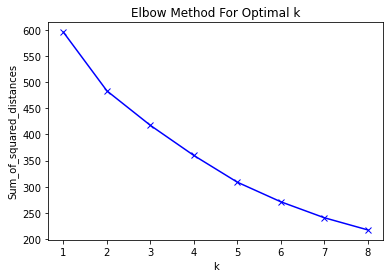

In [129]:
Sum_of_squared_distances = []
K = range(1,9)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state = 2021)
   km = km.fit(vector_data)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##### We can see the elbow at 3 - so let's go with 3.0 as the k value 

#### Let's implement k-means clustering to identify the various types of videos present in our document.

In [108]:
def kmeans_model(data_to_cluster, k_min = 1, k_max= 10, kmeans_max_iters = 200):
    Nc = range(k_min, k_max) #range from 1 to 20 clusters
    kmeans = [KMeans(n_clusters=i, max_iter=kmeans_max_iters, n_init=10) for i in Nc]
    return kmeans

In [295]:
kmeans_output = kmeans_model(X_matrix)

In [124]:
kmeans_output_svd = kmeans_model(vector_data)

In [110]:
def score_eval_kmeans_elbow(data_to_cluster, kmeans_output, k_min = 1, k_max=10):
    Nc = range(k_min, k_max) #range from 1 to 20 clusters
    score = [kmeans_output[i].fit(data_to_cluster).score(data_to_cluster) for i in range(len(kmeans_output))]
    
    print('Number of Scores to evaluate', len(score))
    
    plt.plot(Nc,score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')

    plt.show()
    

Number of Scores to evaluate 9


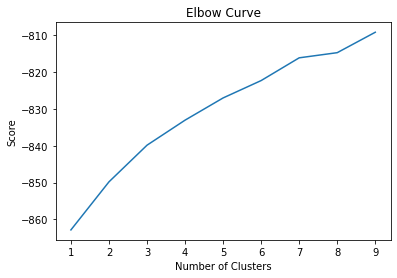

In [111]:
score_eval_kmeans_elbow(X_matrix, kmeans_output)

Number of Scores to evaluate 9


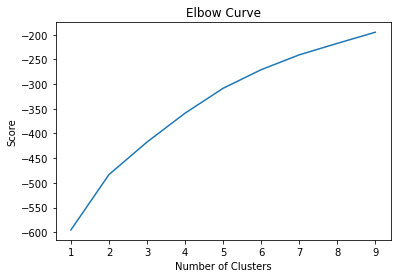

In [126]:
score_eval_kmeans_elbow(vector_data, kmeans_output)

Cluster (k) number with largest Coefficient: 3


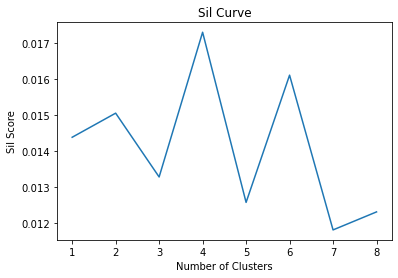

In [113]:
def score_eval_kmeans_sil(data_to_cluster, kmeans_output, k_min = 1, k_max= 10):
    Nc = range(k_min, k_max-1) #range from 1 to 20 clusters
    sil_scores = [metrics.silhouette_score(data_to_cluster, kmeans_output[i].labels_, sample_size=200) for i in range(1,len(kmeans_output))]
    max_score = 0;
    for i in range(1, len(sil_scores)):
        if max_score < sil_scores[i]:
            max_score = sil_scores[i]
            best_cluster = i

#     print(len(sil_scores))        
            
    print('Cluster (k) number with largest Coefficient:',best_cluster)
    
    plt.plot(Nc,sil_scores)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sil Score')
    plt.title('Sil Curve')

    plt.show()
    
    return best_cluster


# score_eval_kmeans_elbow(vector_data, kmeans_output)

kmeans_k_value = score_eval_kmeans_sil(X_matrix, kmeans_output)

Cluster (k) number with largest Coefficient: 6


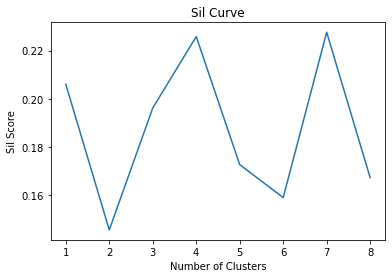

In [125]:
kmeans_k_value_svd = score_eval_kmeans_sil(vector_data, kmeans_output)

In [10]:
kmeans_k_value = 3

In [11]:
n_clusters = kmeans_k_value
#reduced_data = TruncatedSVD(n_components=2).fit_transform(X_matrix)
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=200, n_init=10, random_state = 2021)
model.fit_predict(X_matrix)
labels=model.labels_

In [12]:
%store model

Stored 'model' (KMeans)


In [164]:
df_cd['labels'] = labels

In [165]:
df_cd.columns

Index(['videoId', 'publishedDate', 'title', 'videoUrl', 'description',
       'channelId', 'channelTitle', 'new_comment', 'Title_Desc_Comm',
       'Title_Desc', 'Desc_Comm', 'Title_Comm', 'labels'],
      dtype='object')

### lets visualize the word clouds

In [174]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.7/158.7 kB 3.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [175]:
from wordcloud import WordCloud 

Cluster: 0, Number of videos: 398


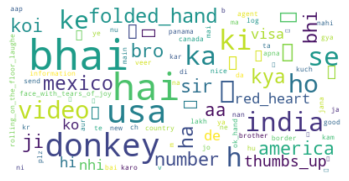

Cluster: 1, Number of videos: 379


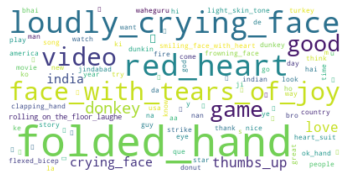

Cluster: 2, Number of videos: 116


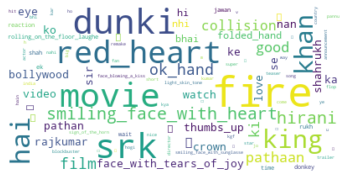

In [176]:
for k in range(n_clusters):
    s=df_cd[df_cd.labels==k] # pick the articles under same label
    count=len(df_cd[df_cd.labels==k])
    text = np.concatenate(s['Title_Desc_Comm'].values)
    #text=s['Title_Desc_Comm'].values.cat(sep=' ') 
    # text=text.lower()
    #print(len(text))
    text=' '.join([word for word in text])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",collocations=False).generate(text)
    print(f'Cluster: {k}, Number of videos: {count}')
    # print('Titles')
    # titles=wiki_cl[wiki_cl.cluster==k]['title']         
    # print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### This confirms that we should go with 3 clusters 

In [13]:
def kmeans_cluster_eval(Xnew, kmeans, cluster_num, cmap_val):
     
    #pca = PCA(n_components=1).fit(Xnew)
    #pca_2d = pca.transform(Xnew)
    
    reduced_data = TruncatedSVD(n_components=2).fit_transform(Xnew)
    
    #reduced_data = TruncatedSVD(n_components=2).fit_transform(X)

    kmeans = KMeans(n_clusters=cluster_num, init='k-means++', max_iter=200, n_init=10, random_state = 2021)
    fitted = kmeans.fit(reduced_data)
    
    
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.get_cmap(cmap_val),
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the videos')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
    '''
    
    predicted = kmeans.predict(reduced_data)    
    
    plt.scatter(Xnew[:, 0], Xnew[:, 1], s=50, cmap='viridis')

    centers = kmeans[cluster_num].cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('K-Means Cluster Plot')
    plt.show()
    
    plt.hist(kmeans_output[kmeans_k_value].labels_, bins=kmeans_k_value)
    plt.title('K-Means Bin (k) Histogram')
    plt.xlabel('k cluster numner')
    plt.ylabel('# of items')
    plt.show()'''
    


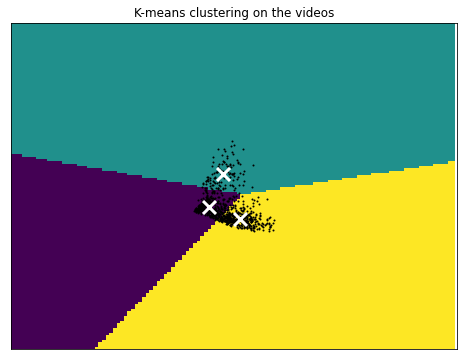

In [290]:
kmeans_cluster_eval(X_matrix, model, kmeans_k_value)

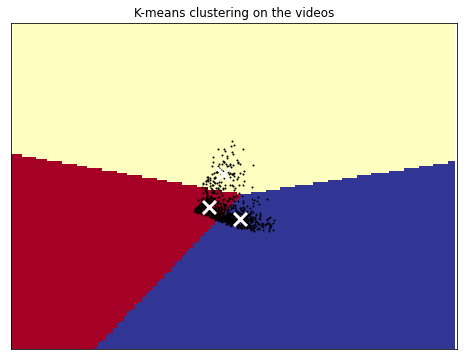

In [15]:
kmeans_cluster_eval(X_matrix, model, kmeans_k_value, 'RdYlBu')

/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 893 samples in 0.000s...
[t-SNE] Computed neighbors for 893 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 893 / 893
[t-SNE] Mean sigma: 0.045775
[t-SNE] Computed conditional probabilities in 0.042s
[t-SNE] Iteration 50: error = 58.9032288, gradient norm = 0.2768362 (50 iterations in 0.152s)
[t-SNE] Iteration 100: error = 57.5635719, gradient norm = 0.2410482 (50 iterations in 0.135s)
[t-SNE] Iteration 150: error = 57.4630852, gradient norm = 0.2497375 (50 iterations in 0.134s)
[t-SNE] Iteration 200: error = 57.4646454, gradient norm = 0.2374971 (50 iterations in 0.127s)
[t-SNE] Iteration 250: error = 57.4717178, gradient norm = 0.2532829 (50 iterations in 0.141s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.471718
[t-SNE] Iteration 300: error = 0.5980942, gradient norm = 0.0004706 (50 iterations in 0.131s)
[t-SNE] Iteration 350: error = 0.5645733, gradient norm = 0.0001806 

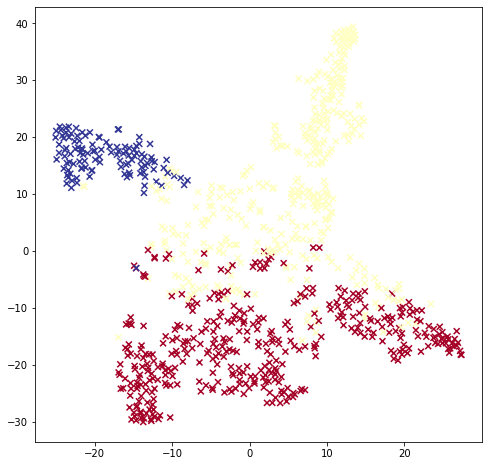

In [77]:
def kmeans_tfidf_viz(vector_data, kmeans, cluster_num):
    tfs_reduced = TruncatedSVD(n_components=cluster_num, random_state=0).fit_transform(vector_data)
    tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)
    fig = plt.figure(figsize = (8, 8))
    ax = plt.axes()
    plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = model.labels_, cmap='RdYlBu')
    plt.show()
    
kmeans_tfidf_viz(X_matrix,model,4) 

In [1]:
%store -r df_cd_trans

In [2]:
df_cd_trans

,videoId,publishedDate,title,videoUrl,description,channelId,channelTitle,new_comment,Title_Desc_Comm,Title_Desc,Desc_Comm,Title_Comm
132,Jqz5L8X4V8s,2023-01-08T04:00:10Z,USA DONKEY VIDEO || Honduras Guatemala to || ह...,https://www.youtube.com/watch?v=Jqz5L8X4V8s,USA DONKEY VIDEO || Honduras Guatemala to Tapa...,UCtLr-VlUjuxh4zUQA6pu_zg,2 Numbari USA Wala,nan Abh Mausam kaisa hai matlab kaise kpde le ...,usa donkey video honduras guatemala to Hondur...,USA DONKEY VIDEO || Honduras Guatemala to || ह...,USA DONKEY VIDEO || Honduras Guatemala to Tapa...,USA DONKEY VIDEO || Honduras Guatemala to || ह...
135,9Mkbq0JFCP0,2023-02-11T11:50:00Z,Welcome in new vlog || again bday cake surpris...,https://www.youtube.com/watch?v=9Mkbq0JFCP0,Hello Thank you for watching this video Give y...,UCxe-tfucj4BB_4MxnoHd4Vw,2 number wale,nan Sir I am coming to meet you personally Hap...,welcome in new vlog again bday cake surprise ...,Welcome in new vlog || again bday cake surpris...,Hello Thank you for watching this video Give y...,Welcome in new vlog || again bday cake surpris...
141,zKTpOIVSJrk,2022-05-09T15:56:26Z,dunkey to USA Via Panama Mexico.. fun video......,https://www.youtube.com/watch?v=zKTpOIVSJrk,this is a fun video created by me subject is d...,UCCjWLMPCbyS13whTycQ1jqw,Ajay Sharma,"nan Very sensitive issue Utpal sir,bade handso...",dunkey to usa via panama mexico fun videono o...,dunkey to USA Via Panama Mexico.. fun video......,this is a fun video created by me subject is d...,dunkey to USA Via Panama Mexico.. fun video......
143,waSiwxvWRqk,2023-01-15T23:47:13Z,India &amp; Pakistan to Serbia Europe Donkey K...,https://www.youtube.com/watch?v=waSiwxvWRqk,India & Pakistan to Europe Donkey Ki Sachiye |...,UC4cb2H-Q3V6pt6bzcsFDxpw,Aman Riar Films,nan Right Wah kya bat righttt👍👍👍 Right Wah kya...,india amp pakistan to serbia europe donkey ki...,India &amp; Pakistan to Serbia Europe Donkey K...,India & Pakistan to Europe Donkey Ki Sachiye |...,India &amp; Pakistan to Serbia Europe Donkey K...
155,MyRFQpEoE-s,2023-01-04T01:30:06Z,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,https://www.youtube.com/watch?v=MyRFQpEoE-s,Jai Mata Di America #usa #usa #america #tr...,UC1X4PBVhNsyavmtdy2XOZFA,Ankush Malik Vlogs,nan lulli se youtube channel ke liye kitna kha...,india India to usa United_States part 06 braz...,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,Jai Mata Di America #usa #usa #america #tr...,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1911,t1m-R3CKJeI,2016-10-25T04:40:21Z,Big Cuz / Chunky Dunkin&#39; Official Video,https://www.youtube.com/watch?v=t1m-R3CKJeI,Performed by Big Cuz IG: big_c.u.z FB: www.fac...,UC4rGANj8sp61NsRVtFH04cw,Big Cuz,nan Thanks Tomato 🍅 Hello dad. Thanks Tomato 🍅...,big cuz chunky dunkin39 official video perfor...,Big Cuz / Chunky Dunkin&#39; Official Video P...,Performed by Big Cuz IG: big_c.u.z FB: www.fac...,Big Cuz / Chunky Dunkin&#39; Official Video n...
1912,vVeAtCP7Hyw,2023-02-05T11:30:10Z,SPAIN EUROPE jaana ITNA EASY kaise ho paaya au...,https://www.youtube.com/watch?v=vVeAtCP7Hyw,How to travel in SPAIN Europe? . A lot of peop...,UCD8TJtF1r0xlEf7lNBR5Yzg,Soul Rover,nan Welcome to Spain 🇪🇸 Chalo ek diljale sedhe...,spain europe jaana itna easy kaise ho paaya a...,SPAIN EUROPE jaana ITNA EASY kaise ho paaya au...,How to travel in SPAIN Europe? . A lot of peop...,SPAIN EUROPE jaana ITNA EASY kaise ho paaya au...
1913,0lV3LjLuGGw,2019-06-02T03:30:02Z,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,https://www.youtube.com/watch?v=0lV3LjLuGGw,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,UC3ar28GS6o1p0m_wabfk2zw,Pen Movies,nan ʙʜᴏᴛᴀᴀᴄʜᴀʜ Excellent ♥️♥️ Hii Very beautif...,baankey ki crazy baraat full hd movie rajpal ...,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...
1914,HmwscxbLp58,2023-02-05T06:00:10Z,Libya🇵🇰🇱🇾🇮🇹To Italy By Ship2023 MostDa

In [4]:
%store -r X_matrix 

In [5]:
X_matrix

<893x21563 sparse matrix of type '<class 'numpy.float64'>'
	with 83698 stored elements in Compressed Sparse Row format>

In [17]:
df_cd_trans['labels'] = labels

In [18]:
df_cd_trans

,videoId,publishedDate,title,videoUrl,description,channelId,channelTitle,new_comment,Title_Desc_Comm,Title_Desc,Desc_Comm,Title_Comm,labels
132,Jqz5L8X4V8s,2023-01-08T04:00:10Z,USA DONKEY VIDEO || Honduras Guatemala to || ह...,https://www.youtube.com/watch?v=Jqz5L8X4V8s,USA DONKEY VIDEO || Honduras Guatemala to Tapa...,UCtLr-VlUjuxh4zUQA6pu_zg,2 Numbari USA Wala,nan Abh Mausam kaisa hai matlab kaise kpde le ...,usa donkey video honduras guatemala to Hondur...,USA DONKEY VIDEO || Honduras Guatemala to || ह...,USA DONKEY VIDEO || Honduras Guatemala to Tapa...,USA DONKEY VIDEO || Honduras Guatemala to || ह...,0
135,9Mkbq0JFCP0,2023-02-11T11:50:00Z,Welcome in new vlog || again bday cake surpris...,https://www.youtube.com/watch?v=9Mkbq0JFCP0,Hello Thank you for watching this video Give y...,UCxe-tfucj4BB_4MxnoHd4Vw,2 number wale,nan Sir I am coming to meet you personally Hap...,welcome in new vlog again bday cake surprise ...,Welcome in new vlog || again bday cake surpris...,Hello Thank you for watching this video Give y...,Welcome in new vlog || again bday cake surpris...,0
141,zKTpOIVSJrk,2022-05-09T15:56:26Z,dunkey to USA Via Panama Mexico.. fun video......,https://www.youtube.com/watch?v=zKTpOIVSJrk,this is a fun video created by me subject is d...,UCCjWLMPCbyS13whTycQ1jqw,Ajay Sharma,"nan Very sensitive issue Utpal sir,bade handso...",dunkey to usa via panama mexico fun videono o...,dunkey to USA Via Panama Mexico.. fun video......,this is a fun video created by me subject is d...,dunkey to USA Via Panama Mexico.. fun video......,1
143,waSiwxvWRqk,2023-01-15T23:47:13Z,India &amp; Pakistan to Serbia Europe Donkey K...,https://www.youtube.com/watch?v=waSiwxvWRqk,India & Pakistan to Europe Donkey Ki Sachiye |...,UC4cb2H-Q3V6pt6bzcsFDxpw,Aman Riar Films,nan Right Wah kya bat righttt👍👍👍 Right Wah kya...,india amp pakistan to serbia europe donkey ki...,India &amp; Pakistan to Serbia Europe Donkey K...,India & Pakistan to Europe Donkey Ki Sachiye |...,India &amp; Pakistan to Serbia Europe Donkey K...,1
155,MyRFQpEoE-s,2023-01-04T01:30:06Z,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,https://www.youtube.com/watch?v=MyRFQpEoE-s,Jai Mata Di America #usa #usa #america #tr...,UC1X4PBVhNsyavmtdy2XOZFA,Ankush Malik Vlogs,nan lulli se youtube channel ke liye kitna kha...,india India to usa United_States part 06 braz...,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,Jai Mata Di America #usa #usa #america #tr...,India 🇮🇳 To USA 🇺🇸 | Part - 06 | Brazil 🇧🇷 से ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,t1m-R3CKJeI,2016-10-25T04:40:21Z,Big Cuz / Chunky Dunkin&#39; Official Video,https://www.youtube.com/watch?v=t1m-R3CKJeI,Performed by Big Cuz IG: big_c.u.z FB: www.fac...,UC4rGANj8sp61NsRVtFH04cw,Big Cuz,nan Thanks Tomato 🍅 Hello dad. Thanks Tomato 🍅...,big cuz chunky dunkin39 official video perfor...,Big Cuz / Chunky Dunkin&#39; Official Video P...,Performed by Big Cuz IG: big_c.u.z FB: www.fac...,Big Cuz / Chunky Dunkin&#39; Official Video n...,1
1912,vVeAtCP7Hyw,2023-02-05T11:30:10Z,SPAIN EUROPE jaana ITNA EASY kaise ho paaya au...,https://www.youtube.com/watch?v=vVeAtCP7Hyw,How to travel in SPAIN Europe? . A lot of peop...,UCD8TJtF1r0xlEf7lNBR5Yzg,Soul Rover,nan Welcome to Spain 🇪🇸 Chalo ek diljale sedhe...,spain europe jaana itna easy kaise ho paaya a...,SPAIN EUROPE jaana ITNA EASY kaise ho paaya au...,How to travel in SPAIN Europe? . A lot of peop...,SPAIN EUROPE jaana ITNA EASY kaise ho paaya au...,1
1913,0lV3LjLuGGw,2019-06-02T03:30:02Z,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,https://www.youtube.com/watch?v=0lV3LjLuGGw,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,UC3ar28GS6o1p0m_wabfk2zw,Pen Movies,nan ʙʜᴏᴛᴀᴀᴄʜᴀʜ Excellent ♥️♥️ Hii Very beautif...,baankey ki crazy baraat full hd movie rajpal ...,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,Baankey Ki Crazy Baraat | Full HD Movie | Rajp...,1
1914,HmwscxbLp58,2023-02-05T06:00:10Z,Libya🇵🇰🇱🇾🇮🇹

In [24]:
%store df_cd_trans

Stored 'df_cd_trans' (DataFrame)


### Now that we have divided our dataset into clusters and have identified cluster 0 and 1 as related to Donkey videos, we will implement out entity recognition tasks on these below. 

Let's find the entities here - the locations and the cities or places mentioned here 

In [23]:
!python -m spacy download xx_ent_wiki_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 5.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')


In [26]:
nlp_wk = spacy.load('xx_ent_wiki_sm')

In [49]:
def find_loc(df):
    locations = []
    for index, row in df.iterrows():
        row_loc = []
        doc_2 = NER()
        doc = nlp_wk(row['Title_Desc_Comm'])
        row_loc.extend([[ent.text] for ent in doc.ents if ent.label_ in ['LOC']])
        #print("lenght or row_loc", len(row_loc))
        locations.append(row_loc)
        #print("Length of locations:", len(locations))
    df['Locations'] = locations 
    return df

In [64]:
df_cd_trans_loc_gpe = find_loc(df_cd_trans)

In [65]:
df_cd_trans_loc_gpe['Locations']

132     [guatemala, guatemala, Honduras, karna, india,...
135     [bhai, bhai, america, bhai, Yours, bhai, bhai,...
141                                      [panama, mexico]
143     [india, pakistan, serbia, Truth, pakistan, Pak...
155     [india, India, brazil, Brazil, krna, panama, b...
                              ...                        
1911    [wwwfacebookcombigcuzthevoodoohillbillyz201647...
1912    [spain, spain, spain, Spain, spain, spain, bha...
1913                                           [hai, hai]
1914    [Pakistan, Libya, Italy, italy, ship2023, liby...
1917                                                   []
Name: Locations, Length: 893, dtype: object

In [52]:
NER = spacy.load("en_core_web_sm")

In [53]:
NER

In [63]:
def find_loc(df):
    locations = []
    for index, row in df.iterrows():
        row_loc = []
        doc = NER(row['Title_Desc_Comm'])
        row_loc.extend([ent.text for ent in doc.ents if ent.label_ in ['GPE']])
        #print("lenght or row_loc", len(row_loc))
        locations.append(row_loc)
        #print("Length of locations:", len(locations))
    df['Locations'] = locations 
    return df

In [51]:
df_cd_trans_loc['Locations']

132     [[usa], [Honduras], [Honduras], [Bad], [Above]...
135     [[Excellent], [Yours], [Lohri Bhaupur], [Bhada...
141                [[usa], [panama mexico], [usa], [usa]]
143       [[india], [pakistan], [serbia europe], [Truth]]
155     [[India], [Brazil], [america usa], [bhai], [Pe...
                              ...                        
1911                                                   []
1912    [[spain], [spain europe], [Spain], [spain], [s...
1913                                     [[इनसै], [इनसै]]
1914    [[italy], [Libya], [Italy], [Libya], [Italy], ...
1917                                                   []
Name: Locations, Length: 893, dtype: object

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(all_locations)

In [74]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
x.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
v.get_feature_names()

/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['150k',
 '2話感想',
 'aab',
 'aaja',
 'aaklela',
 'aati',
 'aaye',
 'acha',
 'afghanistan',
 'africa',
 'agar',
 'age',
 'agenta',
 'aire',
 'airplane',
 'aisi',
 'akela',
 'alaska',
 'albania',
 'america',
 'amrica',
 'amsterdam',
 'ana',
 'anaconda',
 'angeles',
 'announcementdunki',
 'antonio',
 'apnay',
 'arabia',
 'aria',
 'arizona',
 'arkham',
 'arranging',
 'ashu',
 'australia',
 'austria',
 'ayana',
 'ayegi',
 'azerbaijan',
 'azerbeijan',
 'baad',
 'bachay',
 'badhai',
 'badnam',
 'bahamas',
 'bahi',
 'bahio',
 'bahot',
 'baja',
 'bakchodi',
 'baki',
 'bakshe',
 'bala',
 'bana',
 'banara',
 'bang',
 'bangkok',
 'banglore',
 'banya',
 'bapu',
 'bare',
 'batan',
 'batao',
 'batiye',
 'beach',
 'beech',
 'beeru',
 'behari',
 'belgium',
 'belinya',
 'bergamo',
 'besharmiaan',
 'bhadad',
 'bhagwan',
 'bhai',
 'bhaijan',
 'bhaiya',
 'bhot',
 'bhrawan',
 'bi',
 'bille',
 'bina',
 'bindas',
 'bnar',
 'bogota',
 'bola',
 'bolivia',
 'bolna',
 'bolta',
 'bolte',
 'border',
 'bosnia',
 'bos

In [67]:
all_locations = join_tokens(df_cd_trans_loc_gpe, 'Locations')

#### experiments with ChatGPT found that it can identify locations and places more efficiently. Here, we notice that anglicized Hindi and Punjabi words are mistaken as Locations - human intervention needed. 

In [68]:
all_locations

['guatemala guatemala Honduras karna india karna pakistan pakistan bhai bhai karna india karna pakistan pakistan bhai bhai',
 'bhai bhai america bhai Yours bhai bhai bhai bhai bhai Bhadad bhai bhai america bhai Yours bhai bhai bhai bhai bhai',
 'panama mexico',
 'india pakistan serbia Truth pakistan Pakistan',
 'india India brazil Brazil krna panama bhai bhai bhai bhai bhai hai bhai krna panama bhai bhai bhai bhai hai bhai',
 'panama panama pakistan mexico mexico bhai panama bhai India India India India bhai america bhai bhai hai pakistan mexico panama bhai India India India India bhai bana america bhai bhai hai',
 'america colombia panama america america colombia mexico the united states the united states the united states america america iran america america colombia mexico the united states the united states the united states america america iran',
 'america bhai bhai bhai Wikho',
 'bhai besharmiaan dewe bhai ਗਿਆ besharmiaan',
 '',
 'panama Panama panama america panama nan bhai bhai

In [71]:
v.vocabulary_

{'guatemala': 211,
 'honduras': 244,
 'karna': 323,
 'india': 259,
 'pakistan': 475,
 'bhai': 74,
 'america': 19,
 'yours': 675,
 'bhadad': 72,
 'panama': 478,
 'mexico': 424,
 'serbia': 557,
 'truth': 607,
 'brazil': 93,
 'krna': 364,
 'hai': 224,
 'bana': 53,
 'colombia': 127,
 'the': 597,
 'united': 620,
 'states': 578,
 'iran': 264,
 'wikho': 659,
 'besharmiaan': 71,
 'dewe': 148,
 'nan': 443,
 'kam': 312,
 'intijar': 262,
 'pajav': 473,
 'pesaa': 498,
 'kiribati': 347,
 'lagge': 379,
 'nhi': 456,
 'bhagwan': 73,
 'kde': 329,
 'satnam': 553,
 'mehr': 419,
 'canada': 108,
 'italy': 269,
 'switzerland': 581,
 'bergamo': 70,
 'nice': 458,
 'amrica': 20,
 'ghar': 203,
 'holland': 242,
 'france': 195,
 'vadia': 632,
 'ana': 22,
 'jhajjar': 292,
 'peru': 497,
 'necessary': 451,
 'sonuchanalia': 572,
 'singh': 566,
 'lehnda': 385,
 'piara': 502,
 'cuba': 136,
 'maine': 408,
 'ayegi': 37,
 'jruri': 299,
 'hindi': 239,
 'tarik': 588,
 'kiti': 353,
 'sakde': 542,
 'lagga': 378,
 'walo': 652,

#### These are the entities found using the title + Description + comments clusters - Code for source-finding omitted for privacy

### Clusters based on only Title + Description can be found in the /src/clustering_classification.py file - where we test both clustering and classification on the dataset. 